## Create Folders and set Data

In [8]:
from fastai.vision import *

In [25]:
classes = ['tschebureki', 'wareniki', 'pelimeni', 'bilaschi', 'manti']
path = Path('data')/'russian_dough'/'data'
path.mkdir(parents=True, exist_ok=True)

for cl in classes:
    dest = path/cl
    dest.mkdir(parents=True, exist_ok=True)
    csv_path = path/("%s.csv" % cl)
    if not csv_path.exists():
        raise 'csv file for class %s not found!' % cl


### Download Images from Google, then verify

In [7]:
for cl in classes:
    csv_file = path/f"{cl}.csv"
    dest = path/cl
    download_images(csv_file, dest, max_pics=500)

In [8]:
for cl in classes:
    verify_images(path/cl, delete=True, max_size=500)

# Create Databunch and learn!

In [42]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [6]:
load_learner??

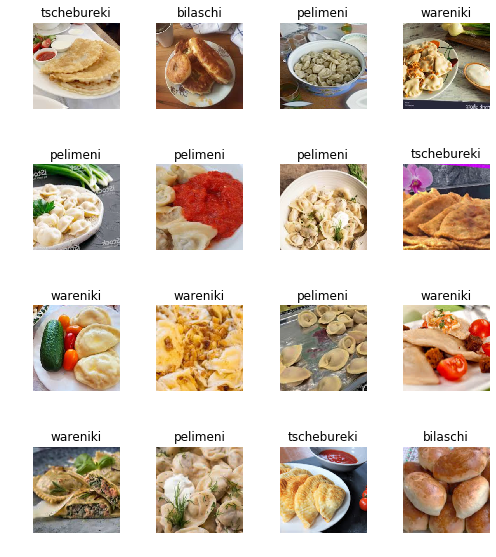

In [43]:
data.show_batch(rows=4, figsize=(7,8))

In [44]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [45]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.604532,1.837698,0.658333,00:20
1,2.110404,1.112478,0.416667,00:20
2,1.680967,1.184863,0.366667,00:19
3,1.388761,1.091213,0.341667,00:20
4,1.181369,0.976799,0.275000,00:20
5,1.001793,0.906487,0.283333,00:20
6,0.860445,0.845591,0.275000,00:20
7,0.786578,0.829906,0.283333,00:19
8,0.696710,0.823519,0.275000,00:19
9,0.631293,0.827467,0.275000,00:19


In [46]:
learn.save('stage-1')#; learn

In [47]:
learn.unfreeze()

In [48]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


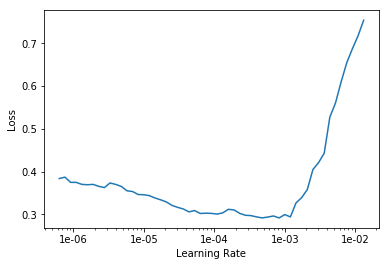

In [49]:
learn.recorder.plot()

In [50]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,3e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.332134,0.821309,0.266667,00:20
1,0.289886,0.819035,0.266667,00:20


In [51]:
# if results are worse
# learn.load('stage-1')

# if results are better
learn.save('stage-2')

# Interpretation

In [26]:
learn.load('stage-1'); 'loaded'

'loaded'

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

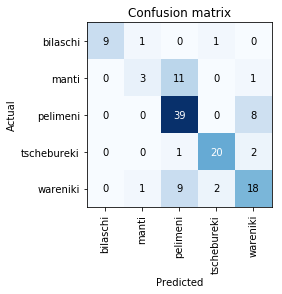

In [22]:
interp.plot_confusion_matrix()

In [52]:
from fastai.widgets import *
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)
learn_cln.load('stage-2');
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [53]:
ImageCleaner(ds, idxs, path)  # does not work in JupyterLab - only in Jupyter Notebook

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [19]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


# Export for Production

In [14]:
learn.load('stage-2')

FileNotFoundError: [Errno 2] No such file or directory: 'data\\russian_dough\\data\\models\\stage-2.pth'

In [54]:
learn.export()

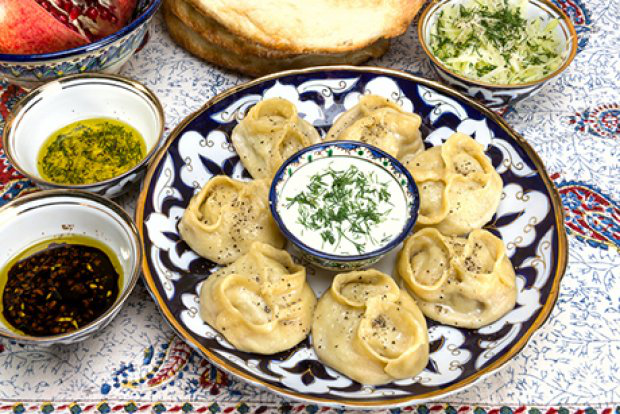

In [10]:
img = open_image(path/'russische-manti.jpg'); img

In [11]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class, outputs

(Category russian_dough,
 tensor([4.4787e-04, 1.7636e-01, 1.5556e-02, 8.0516e-01, 1.8570e-03, 6.1616e-04]))

In [15]:
classes, pred_idx

(['tschebureki', 'wareniki', 'pelimeni', 'bilaschi', 'manti'], tensor(3))